In [247]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [285]:
df=pd.read_csv('medical_examination.csv')

In [295]:
df.head(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0.0


1)  Add 'overweight' column based on BMI. If BMI value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [284]:
df['BMI'] = df['weight']/((df['height']/100)**2)
df['overweight'] = [0 if x <= 25 else 1 for x in df['BMI']]
df.drop(columns='BMI',inplace=True)

2.  Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

In [287]:
df['cholesterol'] = np.where(df['cholesterol']==1, 0,1)
df['gluc'] = np.where(df['gluc']==1, 0,1)

3.  Draw Categorical Plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'. See figure_1.png

In [306]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['active','alco','cholesterol','gluc','overweight','smoke'])

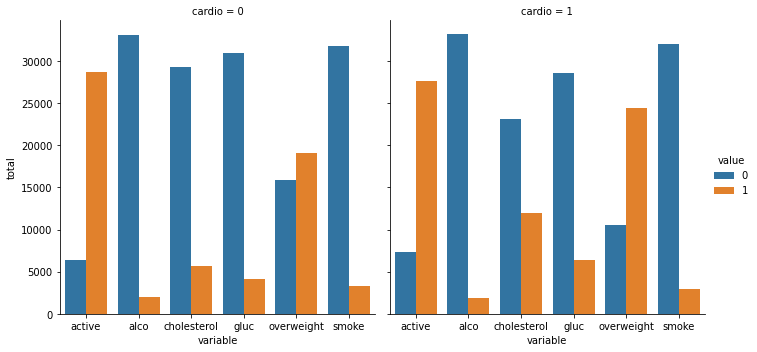

In [269]:
fig = sns.catplot(x='variable',y=None,hue='value',col='cardio',data=df_cat,kind='count')
fig.set_ylabels('total')

4.  Draw Heat Map

In [303]:
#Cleaning the data
df_heat= df[(df['ap_lo'] <= df['ap_hi']) &
            (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) &
            (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]

In [304]:
corr=df_heat.corr()                             #Calculate the correlation matrix
mask = np.zeros_like(corr)                      #Generate a mask for the upper triangle
mask[np.triu_indices_from(mask)] = True

<AxesSubplot: >

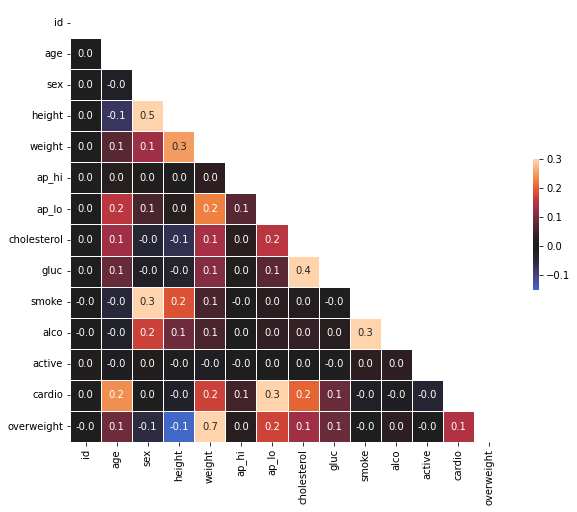

In [310]:
fig, ax = plt.subplots(figsize=(10, 8))        # Set up the matplotlib figure
# Draw the heatmap with the mask
sns.heatmap(corr, mask=mask, annot=True, fmt='0.1f', vmax=0.3, center=0, square=True, linewidths=0.5,cbar_kws={'shrink':.3})